In [6]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, concatenate
from keras.models import Model
data = pd.read_csv("C:/Users/dmcl/Downloads/allver.12.csv")
train_data = data[:int(len(data)*0.7)]
val_data = data[int(len(data)*0.7):int(len(data)*0.9)]
test_data = data[int(len(data)*0.9):]
train_X_A, train_Y = [], []
for i in range(24, len(train_data)-2):
    train_X_A.append(train_data[['penghui.temp', 'gunching.temp', 'wengeng.temp','chibei.temp', 'huayutempTemperature', 'Temperature2']].values[i-24:i, :])
    train_Y.append(train_data[[ 'donghi.temp']].values[i+1:i+3])

train_X_A = np.array(train_X_A)
train_Y = np.array(train_Y)

test_X_A, test_Y = [], []
for i in range(24, len(test_data)-2):
    test_X_A.append(test_data[['penghui.temp', 'gunching.temp', 'wengeng.temp','chibei.temp' , 'huayutempTemperature', 'Temperature2']].values[i-24:i, :])
    test_Y.append(test_data[['donghi.temp']].values[i+1:i+3])

test_X_A = np.array(test_X_A)
test_Y = np.array(test_Y)

val_X_A, val_Y = [], []
for i in range(24, len(val_data)-2):
    val_X_A.append(val_data[['penghui.temp', 'gunching.temp', 'wengeng.temp','chibei.temp' , 'huayutempTemperature', 'Temperature2']].values[i-24:i, :])
    val_Y.append(val_data[['donghi.temp']].values[i+1:i+3])

val_X_A = np.array(val_X_A)
val_Y = np.array(val_Y)
train_X_B, train_Y = [], []
for i in range(24, len(train_data)-2):
    train_X_B.append(train_data[['Td dew point', 'wengengTemperature', 'Td dew point2', 'gunchingTemperature', 'chimei.temp']].values[i-24:i, :])
    train_Y.append(train_data[['donghi.temp']].values[i+1:i+3])

train_X_B = np.array(train_X_B)
train_Y = np.array(train_Y)

test_X_B, test_Y = [], []
for i in range(24, len(test_data)-2):
    test_X_B.append(test_data[['Td dew point', 'wengengTemperature', 'Td dew point2', 'gunchingTemperature', 'chimei.temp']].values[i-24:i, :])
    test_Y.append(test_data[['donghi.temp']].values[i+1:i+3])

test_X_B = np.array(test_X_B)
test_Y = np.array(test_Y)

val_X_B, val_Y = [], []
for i in range(24, len(val_data)-2):
    val_X_B.append(val_data[['Td dew point', 'wengengTemperature', 'Td dew point2', 'gunchingTemperature', 'chimei.temp']].values[i-24:i, :])
    val_Y.append(val_data[['donghi.temp']].values[i+1:i+3])

val_X_B = np.array(val_X_B)
val_Y = np.array(val_Y)
train_X_C, train_Y = [], []
for i in range(24, len(train_data)-2):
    train_X_C.append(train_data[['SeaPres', 'StnPres', 'huayutempStnPres', 'wengengStnPres', 'SeaPres2', 'gunchingStnPres']].values[i-24:i, :])
    train_Y.append(train_data[['donghi.temp']].values[i+1:i+3])

train_X_C = np.array(train_X_C)
train_Y = np.array(train_Y)

test_X_C, test_Y = [], []
for i in range(24, len(test_data)-2):
    test_X_C.append(test_data[['SeaPres', 'StnPres', 'huayutempStnPres', 'wengengStnPres', 'SeaPres2', 'gunchingStnPres']].values[i-24:i, :])
    test_Y.append(test_data[['donghi.temp']].values[i+1:i+3])

test_X_C = np.array(test_X_C)
test_Y = np.array(test_Y)

val_X_C, val_Y = [], []
for i in range(24, len(val_data)-2):
    val_X_C.append(val_data[[ 'SeaPres', 'StnPres', 'huayutempStnPres',   'wengengStnPres', 'SeaPres2', 'gunchingStnPres']].values[i-24:i, :])
    val_Y.append(val_data[['donghi.temp']].values[i+1:i+3])

val_X_C = np.array(val_X_C)
val_Y = np.array(val_Y)
train_X_D, train_Y = [], []
for i in range(24, len(train_data)-2):
    train_X_D.append(train_data[['StnPres2', 'WD2', 'huayutempWD']].values[i-24:i, :])
    train_Y.append(train_data[['donghi.temp']].values[i+1:i+3])

train_X_D = np.array(train_X_D)
train_Y = np.array(train_Y)

test_X_D, test_Y = [], []
for i in range(24, len(test_data)-2):
    test_X_D.append(test_data[['StnPres2', 'WD2', 'huayutempWD']].values[i-24:i, :])
    test_Y.append(test_data[['donghi.temp']].values[i+1:i+3])

test_X_D = np.array(test_X_D)
test_Y = np.array(test_Y)

val_X_D, val_Y = [], []
for i in range(24, len(val_data)-2):
    val_X_D.append(val_data[['StnPres2', 'WD2', 'huayutempWD']].values[i-24:i, :])
    val_Y.append(val_data[['donghi.temp']].values[i+1:i+3])

val_X_D = np.array(val_X_D)
val_Y = np.array(val_Y)


In [7]:
# LSTM Model A
lstm_model_A = Sequential()
lstm_model_A.add(LSTM(128, activation='relu', input_shape=(24, 6)))
lstm_model_A.add(Dense(2))

# LSTM Model B
lstm_model_B = Sequential()
lstm_model_B.add(LSTM(128, activation='relu', input_shape=(24, 5)))
lstm_model_B.add(Dense(2))

# LSTM Model C
lstm_model_C = Sequential()
lstm_model_C.add(LSTM(128, activation='relu', input_shape=(24, 6)))
lstm_model_C.add(Dense(2))

# LSTM Model D
lstm_model_D = Sequential()
lstm_model_D.add(LSTM(128, activation='relu', input_shape=(24, 3)))
lstm_model_D.add(Dense(2))

In [8]:
from keras.callbacks import EarlyStopping

#Set early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')

#Compile and train LSTM Model A
lstm_model_A.compile(optimizer='adam', loss='mse')
lstm_model_A.fit(train_X_A, train_Y, epochs=100, batch_size=24, validation_data=(val_X_A, val_Y), callbacks=[early_stopping])

#Compile and train LSTM Model B
lstm_model_B.compile(optimizer='adam', loss='mse')
lstm_model_B.fit(train_X_B, train_Y, epochs=100, batch_size=24, validation_data=(val_X_B, val_Y), callbacks=[early_stopping])

#Compile and train LSTM Model C
lstm_model_C.compile(optimizer='adam', loss='mse')
lstm_model_C.fit(train_X_C, train_Y, epochs=100, batch_size=24, validation_data=(val_X_C, val_Y), callbacks=[early_stopping])

#Compile and train LSTM Model D
lstm_model_D.compile(optimizer='adam', loss='mse')
lstm_model_D.fit(train_X_D, train_Y, epochs=100, batch_size=24, validation_data=(val_X_D, val_Y), callbacks=[early_stopping])

Epoch 1/100
656/656 [==============================] - 58s 85ms/step - loss: 2.4595 - val_loss: 0.5912
Epoch 2/100
656/656 [==============================] - 60s 91ms/step - loss: 0.5072 - val_loss: 0.5796
Epoch 3/100
656/656 [==============================] - 59s 89ms/step - loss: 0.4726 - val_loss: 0.3985
Epoch 4/100
656/656 [==============================] - 61s 93ms/step - loss: 0.4743 - val_loss: 0.3918
Epoch 5/100
656/656 [==============================] - 62s 94ms/step - loss: 0.4215 - val_loss: 0.4224
Epoch 6/100
656/656 [==============================] - 60s 91ms/step - loss: 0.4595 - val_loss: 0.6239
Epoch 7/100
656/656 [==============================] - 62s 94ms/step - loss: 0.4178 - val_loss: 0.3941
Epoch 8/100
656/656 [==============================] - 60s 92ms/step - loss: 0.4427 - val_loss: 0.3713
Epoch 9/100
656/656 [==============================] - 60s 92ms/step - loss: 0.4350 - val_loss: 0.4649
Epoch 10/100
656/656 [==============================] - 60s 91ms/step - l

In [9]:
val_Y=np.squeeze(val_Y, axis=2)
test_Y=np.squeeze(test_Y, axis=2)
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


preds_A = lstm_model_A.predict(val_X_A)
preds_B = lstm_model_B.predict(val_X_B)
preds_C = lstm_model_C.predict(val_X_C)
preds_D = lstm_model_D.predict(val_X_D)


# Stack all predictions into one array
stacked_preds = np.column_stack((preds_A, preds_B, preds_C, preds_D))

# Use linear regression to combine predictions
lr = LinearRegression()
lr.fit(stacked_preds, val_Y)

# Make final prediction using the ensemble model
ensemble_preds = lr.predict(np.column_stack((lstm_model_A.predict(test_X_A),
                                             lstm_model_B.predict(test_X_B),
                                             lstm_model_C.predict(test_X_C),
                                             lstm_model_D.predict(test_X_D))))

# Calculate RMSE and R2 score for the ensemble predictions
mae = mean_absolute_error(test_Y, ensemble_preds)
rmse = np.sqrt(mean_squared_error(test_Y, ensemble_preds))
r2 = r2_score(test_Y, ensemble_preds)

print('MAE:', mae)
print('RMSE:', rmse)
print('R2 score:', r2)

70/70 [==============================] - 1s 9ms/step
MAE: 0.4240607524164377
RMSE: 0.5377212023223426
R2 score: 0.9481633244602903


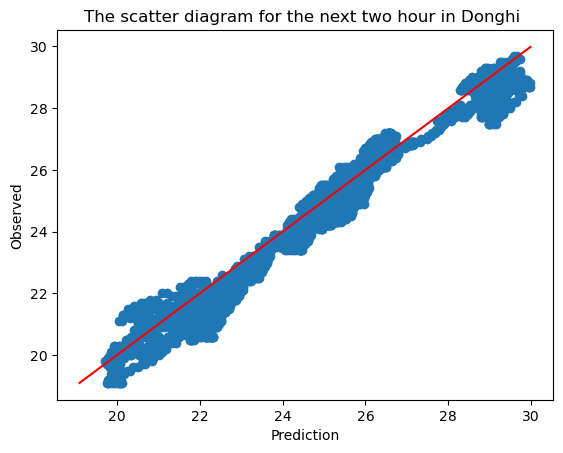

In [13]:
import matplotlib.pyplot as plt

# 假設 stacked_preds 和 val_Y 都是 numpy array
plt.scatter(ensemble_preds,test_Y)
plt.xlabel('Prediction')
plt.ylabel('Observed')
plt.title('The scatter diagram for the next two hour in Donghi ')
min_val = min(np.min(test_Y), np.min(ensemble_preds[:, 0]))
max_val = max(np.max(test_Y), np.max(ensemble_preds[:, 0]))
plt.plot([min_val, max_val], [min_val, max_val], color='red')

plt.show()

